In [56]:
import os
import numpy as np
from simulation_module import SimulationConfig, SimulationState, SimulationRunner, SimulationIO, SimulationVisualizer, AnimationMaker
from laser import Laser
import parralel
from time import time
from parralel_workers import process_single_rolling_average_density_map
from dataclasses import asdict #(for asdict)
num_workers = 7
start0 = time()

laser650 = laser650 = Laser(650, [1,0], saturation = 10, detuning = -2 * np.pi * 20 / 2, Gamma = 2 * np.pi * 20)

dt_exponent = -3
num_steps_exponent = 4


config = SimulationConfig(
    N = 2,
    w = 1.0,
    g = 0.1,
    m = 137.327,  # mass in atomic units
    T = 0,     # temperature in mK
    dt = 10**dt_exponent,
    num_steps = int(10**num_steps_exponent),
    damping = False,
    damping_parameter = 1.0,
    langevin_temperature = False,
    lasers=[laser650, laser650, laser650, laser650]  # or a list of Laser instances
)

config.save_shortform()

state = SimulationState(config)
# state.positions = SimulationIO.load_positions("6_1_positions_1.json")
# state.initial_positions = state.positions.copy()
# state.initialized = True
state.initialize_positions()

# # Use Eddie's user-specific scratch space
# scratch_base = "" #"/exports/eddie/scratch/s2142953"

# quench_trajectory_folder = os.path.join(scratch_base, "quench_folder")
# animation_folder = os.path.join(scratch_base, "animation_folder")
# temperature_folder = os.path.join(scratch_base, "temperature_folder")
# animation_output = "animation_output"
# rolling_average_output = "rolling_average_output"

# # Make sure folders exist
# os.makedirs(quench_trajectory_folder, exist_ok=True)
# os.makedirs(animation_folder, exist_ok=True)
# os.makedirs(temperature_folder, exist_ok=True)
# os.makedirs(animation_output, exist_ok = True)

In [57]:
state.minimize_energy()
state.minimize_forces()

🔍 Minimizing potential energy for N = 2 ions...
✅ Minimization complete. Final energy: 3549.837486
🔍 Solving for force balance (∑F = 0) for N = 2 ions...
✅ Force minimization complete. All net forces are near zero.


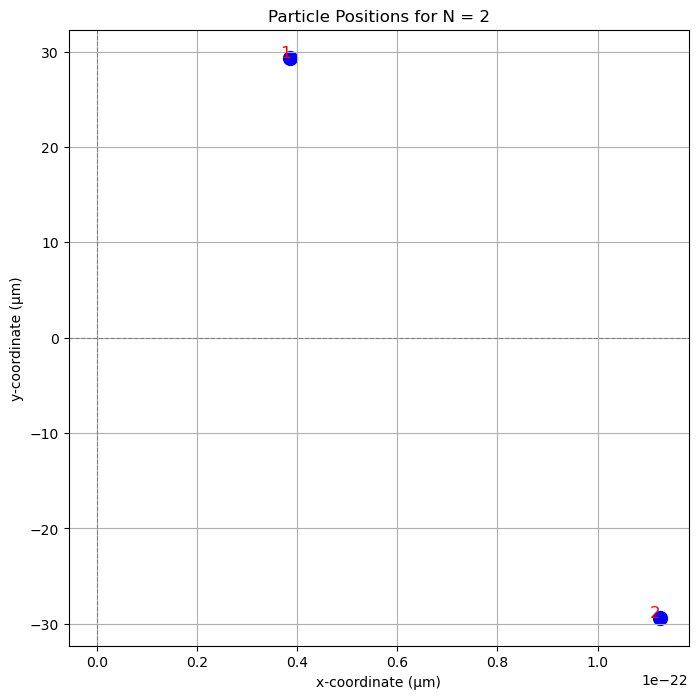

In [58]:
SimulationVisualizer().plot_positions(state, square = False)

[-29, 29]


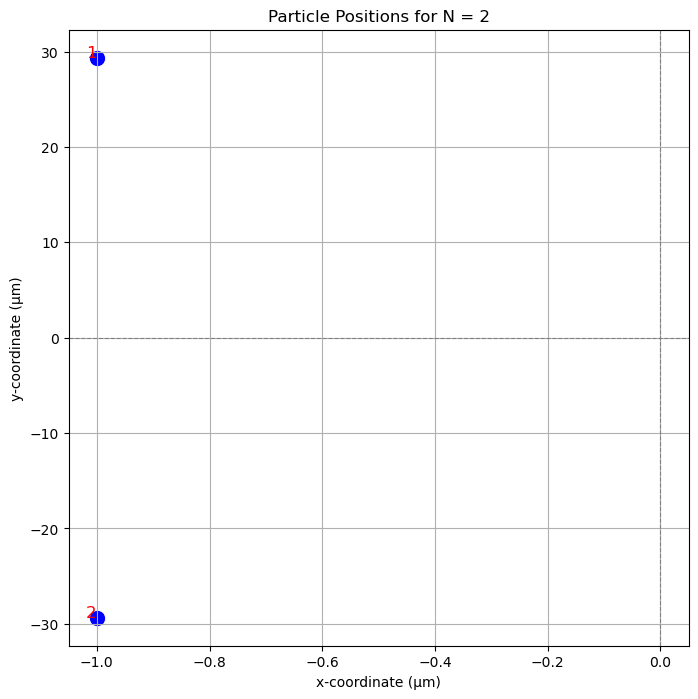

In [61]:
state.positions = np.array([[-1,x[1]] for x in state.positions])
print(sorted([int(x) for x in state.positions[:,1]]))
SimulationVisualizer().plot_positions(state, square = False)
SimulationIO.save_positions(state.positions,f"-test{config.N}_{config.g}_positions_1.json")

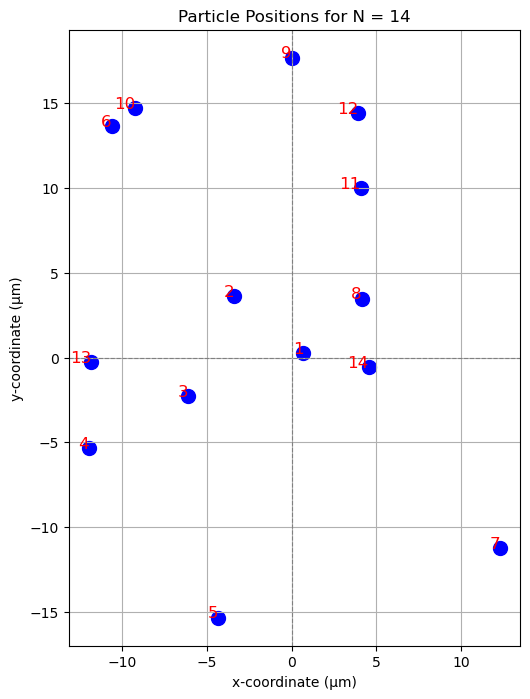

Running with isotropy (γ) = 1.0000 for 1000.0 μs
Running took 83.382 s


In [14]:
start = time()
SimulationVisualizer().plot_positions(state)
runner = SimulationRunner(config, state).run()
print(f"Running took {(time()-start):.3f} s")

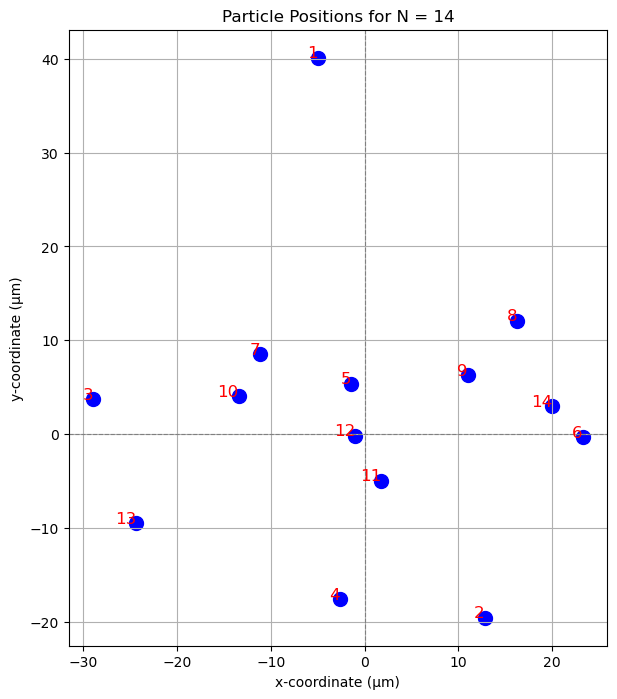

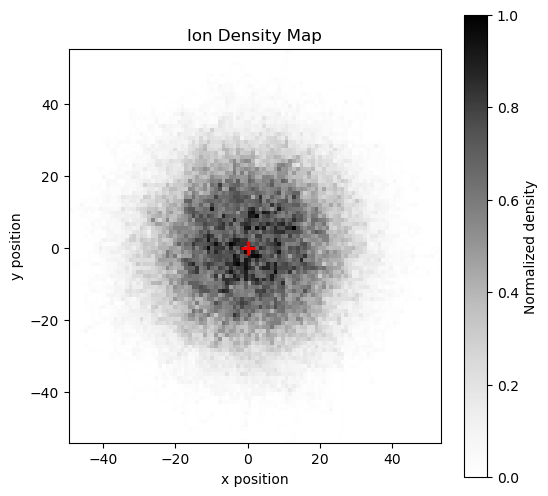

In [18]:
SimulationVisualizer().plot_positions(state)
SimulationVisualizer(save = True).plot_density_map(state)

In [20]:
# # def process_single_temperature_plot(
# #     traj_file: str,
# #     output_dir: str,
# #     base_config_dict: dict,
# #     grainyness: int
# # ):
# SimulationIO.save_trajectory(state.trajectory, "anything.json")

In [26]:
parralel.generate_temperature_plots_from_quench_folder("temp","temperature_plots",config, num_workers = 3)

🔁 Beginning parallel temperature plot generation
Generating temperature plot for temp/6_0.500000_traj_10000_steps.json
✅ All temperature plots generated.


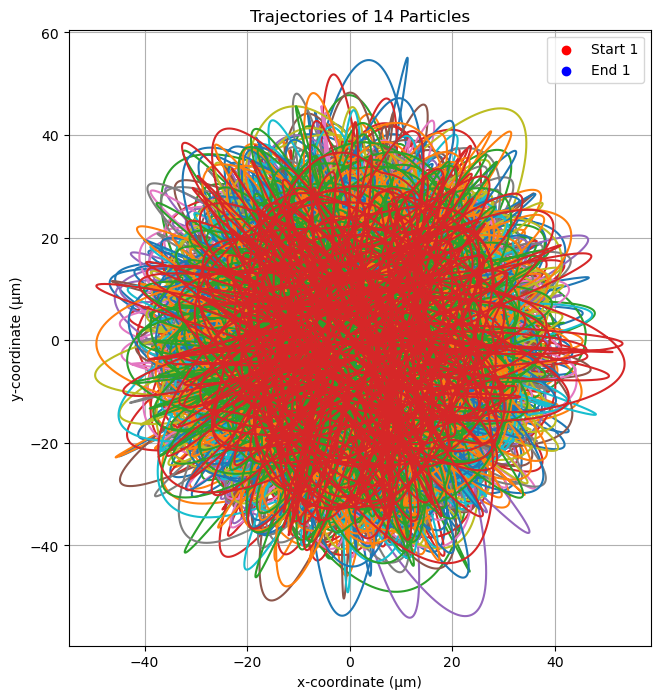

In [16]:
SimulationVisualizer().plot_trajectory(state)